# Plotting heuristics of Machine Learning pipeline

**Author**: Miguel Xochicale [@mxochicale](https://github.com/mxochicale)     
**Contributors**: 
    Nhat Phung Tran Huy [@huynhatd13](https://github.com/huynhatd13);   
    Hamideh Kerdegari [@hamidehkerdegari](https://github.com/hamidehkerdegari);    
    Alberto Gomez [@gomezalberto](https://github.com/)  


## History
* June2022: Adding multiple plots    
* Aug2022: Ploting multiple trains   
* Sep2022: Averaging plots   
* ... 


## Summary
This notebook presents a learning pipeline to classify 4 chamber view from echocardiography datasets.

### How to run the notebook

1. Go to repository path: `cd $HOME/repositories/vital-ultrasound/ML4H2022`
2. Open echocardiography repo in pycharm and in the terminal type:
    ```
    git checkout master # or the branch
    git pull # to bring a local branch up-to-date with its remote version
    ```
3. Launch Notebook server  
    Go to you repository path: `cd $HOME/repositories/vital-ultrasound/ML4H2022/notebooks/` and type in the pycharm terminal:
    ```
    conda activate echo-paper-ve 
    jupyter notebook
    ```
    which will open your web-browser.
    
    
### References
* "Proposed Regulatory Framework for Modifications to Artificial Intelligence/Machine Learning (AI/ML)-Based Software as a Medical Device (SaMD) - Discussion Paper and Request for Feedback". https://www.fda.gov/media/122535/download 
* https://seaborn.pydata.org/generated/seaborn.barplot.html





# Jupyter Notebook

## 1. Setting imports and datasets paths

In [1]:
import os
import fnmatch
import sys
import argparse
import yaml
from pathlib import Path
import json    

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

import numpy as np
import pandas as pd
import seaborn as sns

from typing import Dict, List, Tuple

# from source.helpers.learning_pipeline import json2DataFrame, \
#                                             jsonPARAMS2DataFrame


HOME_PATH = os.path.expanduser(f'~')
USERNAME = os.path.split(HOME_PATH)[1]

REPOSITORY_PATH='repositories/vital-ultrasound/ML4H2022/'
FULL_REPO_PATH = HOME_PATH+'/'+REPOSITORY_PATH



## 2. Setting paths, users and filenames

In [3]:


# ########################################################################
# ########################################################################
# ########################################################################
# ##SqueezeNet_source0() with 733,580 params
# ##BATCH SIZE 
# '/data/results/aug-09-2022_SqueezeNet_hyperparameters/batches'

# TRAIN_VARIABLE_PATH='batches'
# NUMBER_OF_SUBJECTS='05-subjects'
# # NUMBER_OF_SUBJECTS='31-subjects'
# BatchClips='-batches_01'
# # BatchClips='-batches_30'
# FRAMES_PER_SEGMENT_IN_A_CLIP = 1
# LR=0.001
# DATA_RESULTS_PATH='data/results/aug-09-2022_SqueezeNet_hyperparameters/'+\
#                     TRAIN_VARIABLE_PATH+'/'+NUMBER_OF_SUBJECTS+'/'+NUMBER_OF_SUBJECTS+BatchClips




######################################################################
######################################################################
######################################################################
## SqueezeNet_source0() with 733,580 params
###### FRAMES PER CLIP
# /data/results/aug-09-2022_SqueezeNet_hyperparameters/frames_per_clip/05-subjects


TRAIN_VARIABLE_PATH='frames_per_clip'
# NUMBER_OF_SUBJECTS='05-subjects'
NUMBER_OF_SUBJECTS='31-subjects'

# FRAMES_PER_SEGMENT_IN_A_CLIP = '01'
# FRAMES_PER_SEGMENT_IN_A_CLIP = '02'
# FRAMES_PER_SEGMENT_IN_A_CLIP = '05'
# FRAMES_PER_SEGMENT_IN_A_CLIP = '10'
# FRAMES_PER_SEGMENT_IN_A_CLIP = '20'
FRAMES_PER_SEGMENT_IN_A_CLIP = '30'
# FRAMES_PER_SEGMENT_IN_A_CLIP = 'NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_60'?

# BatchClips='01'
BatchClips='30'

LR=0.001
DATA_RESULTS_PATH='data/results/aug-09-2022_SqueezeNet_hyperparameters/'+\
                    TRAIN_VARIABLE_PATH+'/'+NUMBER_OF_SUBJECTS+'/'+\
                    'NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_'+FRAMES_PER_SEGMENT_IN_A_CLIP+'___'+\
                    'BATCH_SIZE_CLIPS_'+BatchClips




########################################################################
########################################################################
########################################################################
##SqueezeNet_source0() with 733,580 params
###### Augmentation

# DATA_RESULTS_PATH='data/results/aug-09-2022_SqueezeNet_hyperparameters/augmentations/05-subjects/'
# BatchClips=25
# FRAMES_PER_SEGMENT_IN_A_CLIP = 10
# NUMBER_OF_SUBJECTS='05-subjects'
# LR=0.001
# TRAIN_VARIABLE_PATH='augmentation00'


# DATA_RESULTS_PATH='data/results/aug-09-2022_SqueezeNet_hyperparameters/augmentations/33-subjects/'
# BatchClips=25
# FRAMES_PER_SEGMENT_IN_A_CLIP = 10
# NUMBER_OF_SUBJECTS='33-subjects'
# LR=0.001
# TRAIN_VARIABLE_PATH='augmentation00'




###################
## LEARNING RATES
# # LR='0_01'
# # LR='0_0001'
# # LR='0_00001'
# LR='0_01'
# LR='0_0001'
# LR='0_00001'


# ####################################
# ##MobileNetV1() with 3,208,450 params
# # NUMBER_OF_SUBJECTS='05-subjects'
# NUMBER_OF_SUBJECTS='31-subjects'
# RESULTS_PATH='scripts/learning-pipeline/results/mobileNetV1-8-aug-2022/'+NUMBER_OF_SUBJECTS

#######################################
##MobileNet2() with 2,225,858 params
# NUMBER_OF_SUBJECTS='05-subjects'
# # NUMBER_OF_SUBJECTS='31-subjects'
# RESULTS_PATH='scripts/learning-pipeline/results/5th-tests-04-augs-2022/'+NUMBER_OF_SUBJECTS

# ####################################
# ##SqueezeNet_source0() with 733,580 params
# # NUMBER_OF_SUBJECTS='05-subjects'
# NUMBER_OF_SUBJECTS='31-subjects'
# RESULTS_PATH='scripts/learning-pipeline/results/6th-tests-05-aug-2022/'+NUMBER_OF_SUBJECTS




#####################
##Ploting settings
TRAINING_CURVES_PATH = os.path.join(FULL_REPO_PATH, DATA_RESULTS_PATH)
PLOTTING_RESULTS_PATH = TRAINING_CURVES_PATH + '/plotting_results/'
os.makedirs(PLOTTING_RESULTS_PATH, exist_ok=True)
DPI_val=200


## Printing Versions and paths
print(f'Pandas Version: {pd.__version__}')
print(f'seaborn Version: {sns.__version__}')
print(f'TRAINING_CURVES_PATH: {TRAINING_CURVES_PATH}' )
print(f'PLOTTING_RESULTS_PATH: {PLOTTING_RESULTS_PATH}' )

Pandas Version: 1.1.3
seaborn Version: 0.11.0
TRAINING_CURVES_PATH: /home/mx19/repositories/vital-ultrasound/ML4H2022/data/results/aug-09-2022_SqueezeNet_hyperparameters/frames_per_clip/31-subjects/NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_30___BATCH_SIZE_CLIPS_30
PLOTTING_RESULTS_PATH: /home/mx19/repositories/vital-ultrasound/ML4H2022/data/results/aug-09-2022_SqueezeNet_hyperparameters/frames_per_clip/31-subjects/NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_30___BATCH_SIZE_CLIPS_30/plotting_results/


In [4]:
## Defining methods

def json2DataFrame(PATH, FILENAME, TYPE_str, FRAMES_PER_SEGMENT_IN_A_CLIP, BatchClips, LR, STR_VARIABLE_NAME,
                   RUN_VERSION):
    FULL_PATH_FILENAME = os.path.join(PATH, FILENAME)
    pd_read_json = pd.read_json(
        FULL_PATH_FILENAME,
        orient='columns',
        typ='series')

    Filtered_JSON_stats = pd_read_json[TYPE_str]
    DFDICT = pd.DataFrame.from_dict(Filtered_JSON_stats).reset_index().melt(id_vars=['index']).rename(
        columns={"index": "epochs"})
    DFDICT.insert(1, 'LR', 'lr' + str(LR), True)
    DFDICT.insert(2, 'N_BatchClips', 'bc' + str(BatchClips), True)
    DFDICT.insert(3, 'FRXClips', str(FRAMES_PER_SEGMENT_IN_A_CLIP), True)
    DFDICT.rename(columns={"variable": "datatype"}, inplace=True)
    DFDICT.rename(columns={"value": STR_VARIABLE_NAME}, inplace=True)
    DFDICT.insert(6, 'RUN_NN', str(RUN_VERSION), True)
    return DFDICT


def jsonPARAMS2DataFrame(PATH, FILENAME):
    FULL_PATH_FILENAME = os.path.join(PATH, FILENAME)
    pd_read_json = pd.read_json(
        FULL_PATH_FILENAME,
        orient='columns',
        typ='series')
    return pd_read_json


## 2. Reading dictionaries and filtering files

In [5]:
print(f'TRAINING_CURVES_PATH: {TRAINING_CURVES_PATH}' )
os.chdir(TRAINING_CURVES_PATH)

pattern = 'TEMP_DICT_TRAINING_CURVES_FOR_____LOSS_ACC*.json'
json_files=fnmatch.filter(  sorted(os.listdir(TRAINING_CURVES_PATH), key=lambda x: x[-6])  , pattern)
print(f'-------------------')
print(f'-----Loss curves')
for i in range(0,len(json_files)):
    print(i, json_files[i])
    
    
pattern_params = 'TEMP_DICT_TRAINING_CURVES_FOR____TRAINING_PARAMETERS*.json'
json_files_params=fnmatch.filter(  sorted(os.listdir(TRAINING_CURVES_PATH), key=lambda x: x[-6])  , pattern_params)    
print(f'-------------------')
print(f'----Parameters')
for i in range(0,len(json_files_params)):
    print(i, json_files_params[i])    


RUN_VERSION=[json_files[0][-12:-5], json_files[1][-12:-5], json_files[2][-12:-5]]
print(f'-------------------')
print(f'----RUN_VERSION')
for i in range(0,len(RUN_VERSION)):
    print(i, RUN_VERSION[i])    






TRAINING_CURVES_PATH: /home/mx19/repositories/vital-ultrasound/ML4H2022/data/results/aug-09-2022_SqueezeNet_hyperparameters/frames_per_clip/31-subjects/NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_30___BATCH_SIZE_CLIPS_30
-------------------
-----Loss curves
0 TEMP_DICT_TRAINING_CURVES_FOR_____LOSS_ACC_TRAINset_clips_222TESTset_clips_44VALset_clips42___EPOCHS_500_BATCH_SIZE_OF_CLIPS_30_NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_30_LEARNING_RATE_0_0010000000_TRAINVERSION_train00.json
1 TEMP_DICT_TRAINING_CURVES_FOR_____LOSS_ACC_TRAINset_clips_216TESTset_clips_44VALset_clips48___EPOCHS_500_BATCH_SIZE_OF_CLIPS_30_NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_30_LEARNING_RATE_0_0010000000_TRAINVERSION_train01.json
2 TEMP_DICT_TRAINING_CURVES_FOR_____LOSS_ACC_TRAINset_clips_226TESTset_clips_42VALset_clips40___EPOCHS_500_BATCH_SIZE_OF_CLIPS_30_NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_30_LEARNING_RATE_0_0010000000_TRAINVERSION_train02.json
-------------------
----Parameters
0 TEMP_DICT_TRAINING_CURVES_FOR____TR

## 2. Plotting training curves

     epochs       LR N_BatchClips FRXClips datatype    Acc [%]   RUN_NN
0         0  lr0.001         bc30       30    train  48.875000  train00
1         1  lr0.001         bc30       30    train  48.125000  train00
2         2  lr0.001         bc30       30    train  47.000000  train00
3         3  lr0.001         bc30       30    train  54.000000  train00
4         4  lr0.001         bc30       30    train  44.500000  train00
..      ...      ...          ...      ...      ...        ...      ...
995     495  lr0.001         bc30       30     test  80.952381  train02
996     496  lr0.001         bc30       30     test  71.428571  train02
997     497  lr0.001         bc30       30     test  78.571429  train02
998     498  lr0.001         bc30       30     test  76.190476  train02
999     499  lr0.001         bc30       30     test  78.571429  train02

[3000 rows x 7 columns]


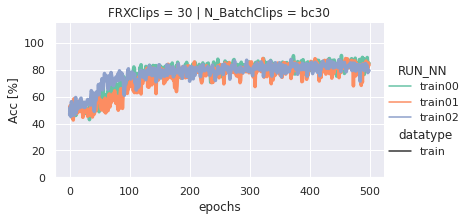

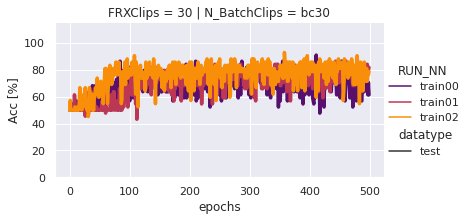

     epochs       LR N_BatchClips FRXClips datatype      Loss   RUN_NN
0         0  lr0.001         bc30       30    train  0.765812  train00
1         1  lr0.001         bc30       30    train  0.805230  train00
2         2  lr0.001         bc30       30    train  0.780438  train00
3         3  lr0.001         bc30       30    train  0.770948  train00
4         4  lr0.001         bc30       30    train  0.742177  train00
..      ...      ...          ...      ...      ...       ...      ...
995     495  lr0.001         bc30       30     test  0.464174  train02
996     496  lr0.001         bc30       30     test  0.685685  train02
997     497  lr0.001         bc30       30     test  0.412188  train02
998     498  lr0.001         bc30       30     test  0.540888  train02
999     499  lr0.001         bc30       30     test  0.617779  train02

[3000 rows x 7 columns]


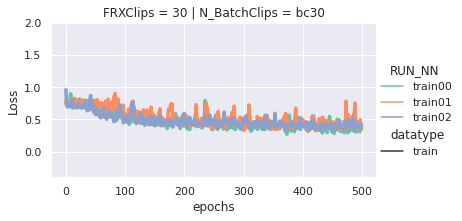

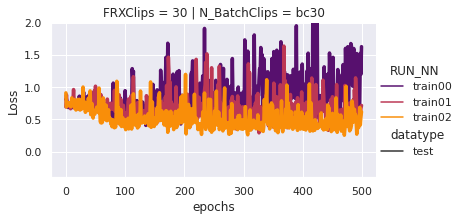

In [6]:
TYPE_str = 'ACC'    
STR_VARIABLE_NAME = 'Acc [%]'
# RUN_VERSION=['run02', 'run00', 'run01']

acc0_all_=json2DataFrame(TRAINING_CURVES_PATH,str(json_files[0]), 
                    TYPE_str, FRAMES_PER_SEGMENT_IN_A_CLIP, BatchClips,LR, STR_VARIABLE_NAME, RUN_VERSION[0])
acc1_all_=json2DataFrame(TRAINING_CURVES_PATH,str(json_files[1]), 
                    TYPE_str, FRAMES_PER_SEGMENT_IN_A_CLIP, BatchClips,LR, STR_VARIABLE_NAME, RUN_VERSION[1])
acc2_all_=json2DataFrame(TRAINING_CURVES_PATH,str(json_files[2]), 
                    TYPE_str, FRAMES_PER_SEGMENT_IN_A_CLIP, BatchClips,LR, STR_VARIABLE_NAME, RUN_VERSION[2])


acc_dfall = [acc0_all_, acc1_all_,acc2_all_]
acc_all = pd.concat(acc_dfall)
print(acc_all)


sns.set(style="darkgrid")#sns.set(style="ticks")
g0=sns.relplot(x="epochs", y=STR_VARIABLE_NAME, 
            hue="RUN_NN",
            col="N_BatchClips", 
            row="FRXClips", 
            style="datatype",
            #col_wrap=2, 
            height=3, aspect=1.75, linewidth=3.5,
            kind="line", 
            estimator=None,
            palette="Set2",#palette=palette,
            data=acc_all.query("datatype == 'train'"))#data=acc_all)
g0.set(ylim=(0, 115))

sns.set(style="darkgrid")
g1=sns.relplot(x="epochs", y=STR_VARIABLE_NAME, 
            hue="RUN_NN",
            col="N_BatchClips", 
            row="FRXClips", 
            style="datatype",
            #col_wrap=2, 
            height=3, aspect=1.75, linewidth=3.5,
            kind="line", 
            estimator=None,
            palette="inferno",#palette=palette,
            data=acc_all.query("datatype == 'test'"))#data=acc_all)
g1.set(ylim=(0, 115))


g0.savefig(PLOTTING_RESULTS_PATH+'ACC_train.png', dpi=DPI_val)
g1.savefig(PLOTTING_RESULTS_PATH+'ACC_test.png', dpi=DPI_val)
plt.show()


TYPE_str = 'LOS'    
STR_VARIABLE_NAME = 'Loss'
loss0_all_=json2DataFrame(TRAINING_CURVES_PATH,str(json_files[0]), 
                    TYPE_str, FRAMES_PER_SEGMENT_IN_A_CLIP, BatchClips,LR, STR_VARIABLE_NAME, RUN_VERSION[0])
loss1_all_=json2DataFrame(TRAINING_CURVES_PATH,str(json_files[1]), 
                    TYPE_str, FRAMES_PER_SEGMENT_IN_A_CLIP, BatchClips,LR, STR_VARIABLE_NAME, RUN_VERSION[1])
loss2_all_=json2DataFrame(TRAINING_CURVES_PATH,str(json_files[2]), 
                    TYPE_str, FRAMES_PER_SEGMENT_IN_A_CLIP, BatchClips,LR, STR_VARIABLE_NAME, RUN_VERSION[2])

loss_dfall = [loss0_all_, loss1_all_,loss2_all_]
loss_all = pd.concat(loss_dfall)
print(loss_all)


sns.set(style="darkgrid")#sns.set(style="ticks")
g2=sns.relplot(x="epochs", y=STR_VARIABLE_NAME, 
            hue="RUN_NN",
            col="N_BatchClips", 
            row="FRXClips", 
            style="datatype",
            #col_wrap=2, 
            height=3, aspect=1.75, linewidth=3.5,
            kind="line", 
            estimator=None,
            palette="Set2",#palette=palette,
            data=loss_all.query("datatype == 'train'"))#data=acc_all)
g2.set(ylim=(-0.4, 2))

sns.set(style="darkgrid")
g3=sns.relplot(x="epochs", y=STR_VARIABLE_NAME, 
            hue="RUN_NN",
            col="N_BatchClips", 
            row="FRXClips", 
            style="datatype",
            #col_wrap=2, 
            height=3, aspect=1.75, linewidth=3.5,
            kind="line", 
            estimator=None,
            palette="inferno",#palette=palette,
            data=loss_all.query("datatype == 'test'"))#data=acc_all)
g3.set(ylim=(-0.4, 2))

g2.savefig(PLOTTING_RESULTS_PATH+'LOSS_train.png', dpi=DPI_val)
g3.savefig(PLOTTING_RESULTS_PATH+'LOSS_test.png', dpi=DPI_val)

plt.show()


    

## 3. Plotting Paramters of Performance

elapsed_time_for_the_NOTEBOOK_in_secs [147.1530436595281, 142.6546942949295, 151.1591067592303]
elapsed_time_for_the_training_loop_in_secs [142.06645431518555, 137.61643666823704, 146.14390178521475]
Precision [0.7625000000000001, 0.9, 0.85]
Recall [0.69047619047619, 0.875, 0.85]
F1score [0.667681071211199, 0.873015873015873, 0.85]
       Dataset Classification type  Classification [%]   RUN_NN
0  31-subjects           Precision            0.762500  train00
1  31-subjects           Precision            0.900000  train01
2  31-subjects           Precision            0.850000  train02
0  31-subjects              Recall            0.690476  train00
1  31-subjects              Recall            0.875000  train01
2  31-subjects              Recall            0.850000  train02
0  31-subjects             F1score            0.667681  train00
1  31-subjects             F1score            0.873016  train01
2  31-subjects             F1score            0.850000  train02


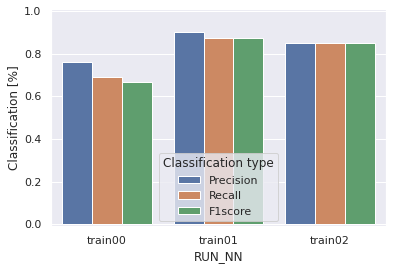

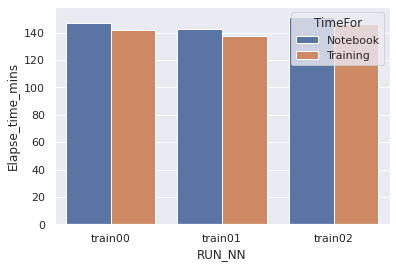

In [7]:
elapsed_time_for_the_NOTEBOOK_in_secs=[]
elapsed_time_for_the_training_loop_in_secs=[]

elapsed_time_for_the_NOTEBOOK_in_mins=[]
elapsed_time_for_the_training_loop_in_mins=[]


Precision=[]
Recall=[]
F1score=[]


for i in range(0, len(json_files_params)):
    params=jsonPARAMS2DataFrame(TRAINING_CURVES_PATH,str(json_files_params[i]))
    #elapsed_time_for_the_NOTEBOOK_in_secs.append(params[0])
    #elapsed_time_for_the_training_loop_in_secs.append(params[1])

    elapsed_time_for_the_NOTEBOOK_in_mins.append(params[0]/60)
    elapsed_time_for_the_training_loop_in_mins.append(params[1]/60)
    
    Precision.append(params[11]['Precision']['weighted avg/Total'])
    Recall.append(params[11]['Recall']['weighted avg/Total'])
    F1score.append(params[11]['F1-score']['weighted avg/Total'])
    
print(f'elapsed_time_for_the_NOTEBOOK_in_secs {elapsed_time_for_the_NOTEBOOK_in_mins}')    
print(f'elapsed_time_for_the_training_loop_in_secs {elapsed_time_for_the_training_loop_in_mins}')
print(f'Precision {Precision}')   
print(f'Recall {Recall}')   
print(f'F1score {F1score}')


##
Y_AXIS_LABEL='Classification [%]'
precision_report_df = pd.DataFrame(Precision).reset_index(drop=True)
precision_report_df.rename(columns={0:Y_AXIS_LABEL}, inplace=True)
precision_report_df.insert(0, 'Classification type', 'Precision', True)
precision_report_df['RUN_NN'] = RUN_VERSION
precision_report_df.insert(0, 'Dataset', NUMBER_OF_SUBJECTS, True)

recall_report_df = pd.DataFrame(Recall).reset_index(drop=True)
recall_report_df.rename(columns={0:Y_AXIS_LABEL}, inplace=True)
recall_report_df.insert(0, 'Classification type', 'Recall', True)
recall_report_df['RUN_NN'] = RUN_VERSION
recall_report_df.insert(0, 'Dataset', NUMBER_OF_SUBJECTS, True)

f1score_report_df = pd.DataFrame(F1score).reset_index(drop=True)
f1score_report_df.rename(columns={0:Y_AXIS_LABEL}, inplace=True)
f1score_report_df.insert(0, 'Classification type', 'F1score', True)
f1score_report_df['RUN_NN'] = RUN_VERSION
f1score_report_df.insert(0, 'Dataset', NUMBER_OF_SUBJECTS, True)

classification_df = pd.concat([precision_report_df, recall_report_df, f1score_report_df])
print(classification_df)
g4=sns.barplot(x="RUN_NN", 
               y=Y_AXIS_LABEL, 
               hue="Classification type", 
                 data=classification_df)

g4.set(ylim=(-0.01, 1.01))
plt.savefig(PLOTTING_RESULTS_PATH+'df_classification.png', dpi=DPI_val)
plt.show()

Y_AXIS_LABEL='Elapse_time_mins'
timenotebook_df = pd.DataFrame(elapsed_time_for_the_NOTEBOOK_in_mins).reset_index(drop=True)
timenotebook_df.rename(columns={0:Y_AXIS_LABEL}, inplace=True)
timenotebook_df['RUN_NN'] = RUN_VERSION
timenotebook_df.insert(0, 'Dataset', NUMBER_OF_SUBJECTS, True)
timenotebook_df.insert(3, 'TimeFor', 'Notebook', True)

timetraining_df = pd.DataFrame(elapsed_time_for_the_training_loop_in_mins).reset_index(drop=True)
timetraining_df.rename(columns={0:Y_AXIS_LABEL}, inplace=True)
timetraining_df['RUN_NN'] = RUN_VERSION
timetraining_df.insert(0, 'Dataset', NUMBER_OF_SUBJECTS, True)
timetraining_df.insert(3, 'TimeFor', 'Training', True)

df_all = pd.concat([timenotebook_df, timetraining_df])

g5=sns.barplot(x="RUN_NN", 
               y=Y_AXIS_LABEL, 
               hue="TimeFor", 
                data=df_all)

plt.savefig(PLOTTING_RESULTS_PATH+'df_timetraining.png', dpi=DPI_val)
plt.show()




